In [23]:
from bs4 import BeautifulSoup
from collections import Counter
import requests
import pandas as pd
from tkinter import *
import threading

In [24]:
def web_scrape():

    global categories, headlines, headlineSet, links, linkSet, allArticleText, allArticleTextSet, categoryNames, storyLengths, categories2

    categories = ['https://www.bbc.com/urdu/topics/cjgn7n9zzq7t', 'https://www.bbc.com/urdu/topics/cw57v2pmll9t',
                  'https://www.bbc.com/urdu/topics/c340q0p2585t', 'https://www.bbc.com/urdu/topics/ckdxnx900n5t',
                  'https://www.bbc.com/urdu/topics/c40379e2ymxt']

    category = []  # column2
    categorySet = set()
    text = []
    textSet = set()


In [25]:
import requests
from bs4 import BeautifulSoup

def web_scrape():
    # Your existing code...

    catNum = 1
    for category in categories:
        for i in range(1, 12):
            page = requests.get(category + "/page/" + str(i)).text
            soup = BeautifulSoup(page, 'lxml')
            articles = soup.find_all('article', class_='qa-post gs-u-pb-alt+ lx-stream-post gs-u-pt-alt+ gs-u-align-left')

            for article in articles:
                # Extract headline and link
                headline = article.find('a', class_='qa-heading-link lx-stream-post__header-link').text
                link = article.find('a', class_='qa-heading-link lx-stream-post__header-link')['href']

                # Check if the headline is unique before adding to the list
                if headline not in headlineSet:
                    category.append(headline)
                    categorySet.add(headline)

                    # Add link to the list
                    text.append(link)
                    textSet.add(link)



            # Increment category number for the next category
            catNum += 1

# Define the 'categories' list
categories = ['https://www.bbc.com/urdu/topics/cjgn7n9zzq7t', 'https://www.bbc.com/urdu/topics/cw57v2pmll9t',
              'https://www.bbc.com/urdu/topics/c340q0p2585t', 'https://www.bbc.com/urdu/topics/ckdxnx900n5t',
              'https://www.bbc.com/urdu/topics/c40379e2ymxt']

# Call the function to execute the web scraping
web_scrape()


In [1]:
# Upgrade seaborn to the latest version
!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # Import Seaborn for improved styling
from collections import Counter

In [28]:
import pandas as pd
df = pd.read_csv(categories)


In [29]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


<ipython-input-5-9ee7386496a8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


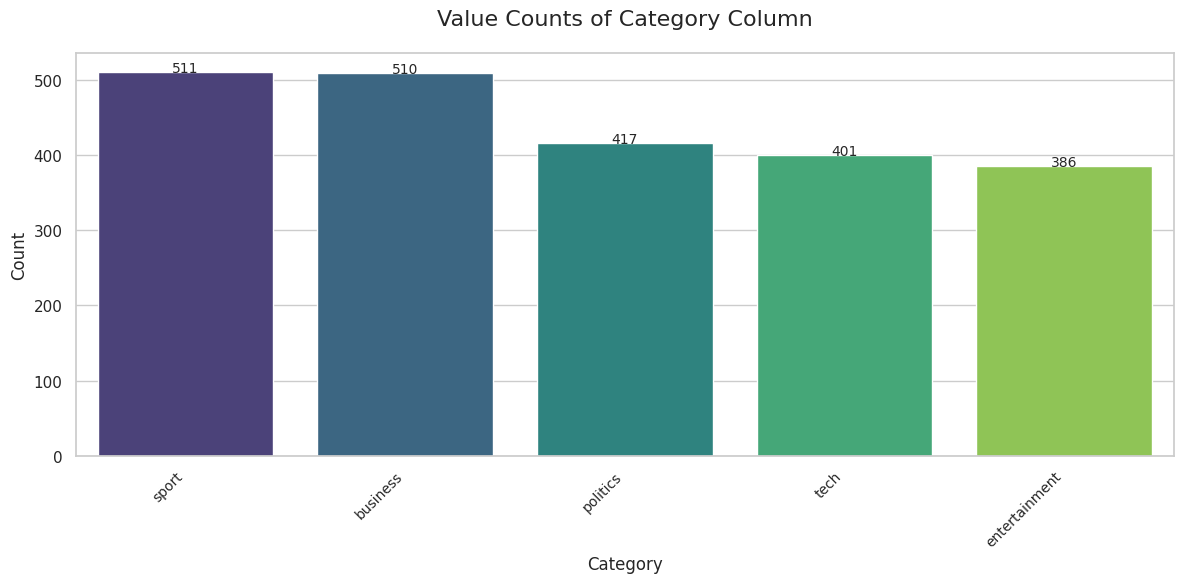

In [5]:
value_counts = df['category'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=value_counts.index, legend=False)
ax.set_title('Value Counts of Category Column', fontsize=16, pad=20)  # Add title with larger font size and padding
ax.set_xlabel('Category', fontsize=12)  # Customize x-axis label
ax.set_ylabel('Count', fontsize=12)  # Customize y-axis label

# Rotate x-axis tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


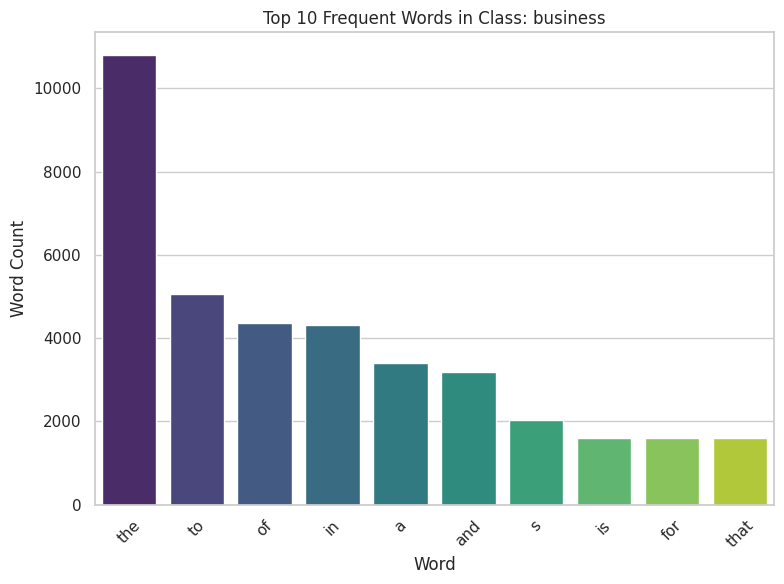

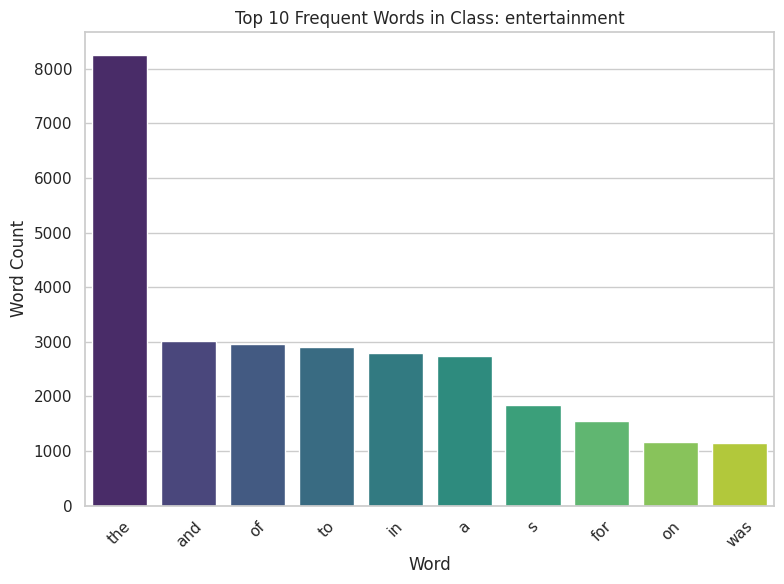

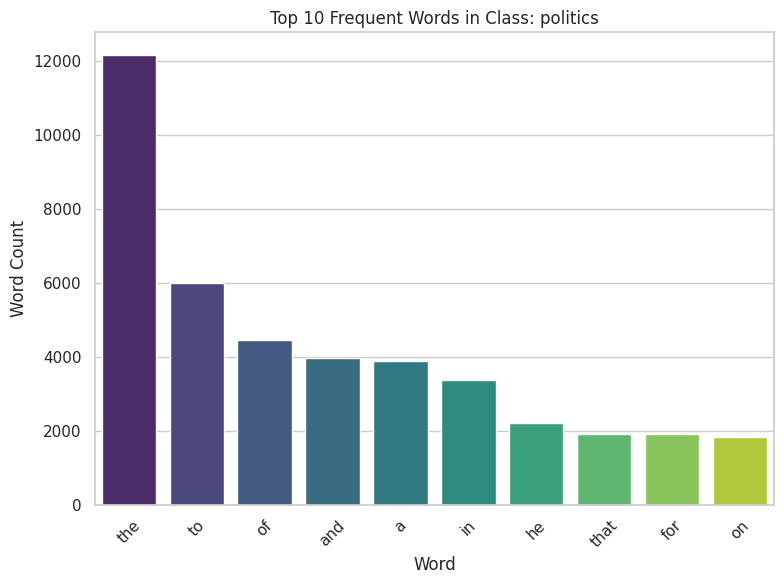

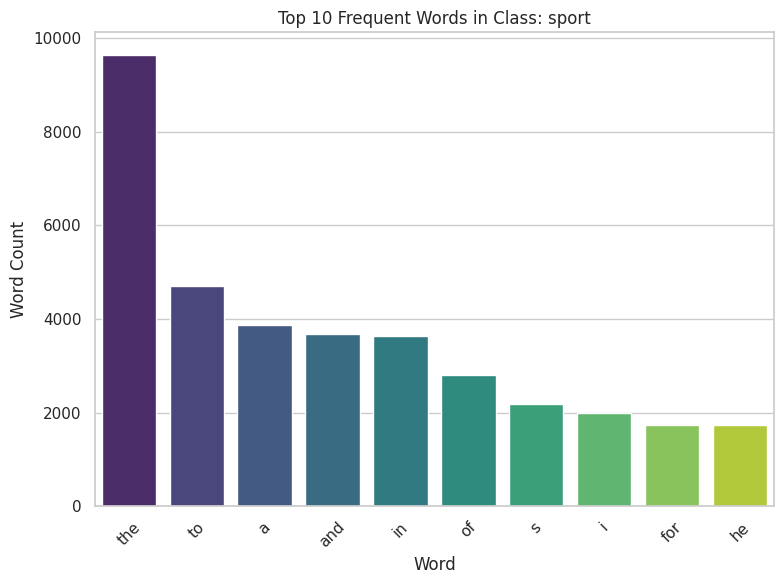

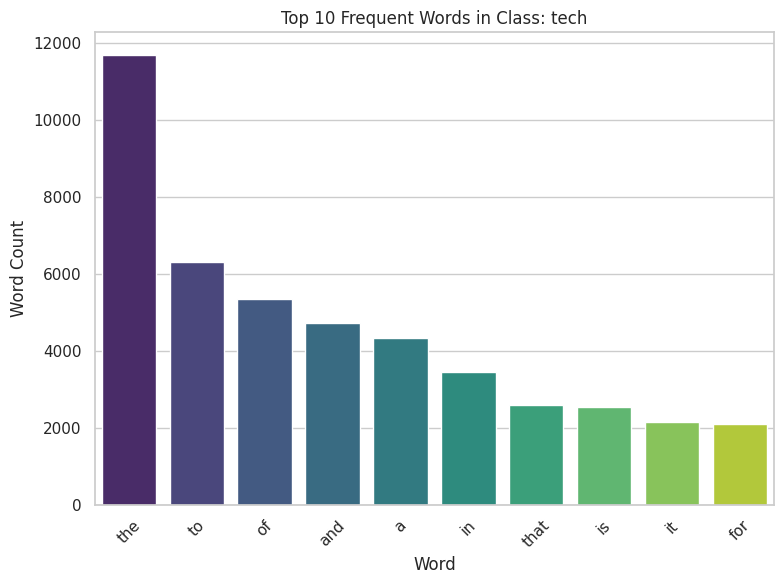

In [7]:
def get_top_words_by_class(df, text_column_name):
    # Create a dictionary to store the top 10 frequent words for each class
    top_words_by_class = {}

    # Group the DataFrame by 'category' column
    grouped = df.groupby('category')

    # Iterate through each group (class)
    for category, group_df in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_df[text_column_name])

        # Tokenize the text (split it into words)
        words = text.split()

        # Count the frequency of each word within the class
        word_counts = Counter(words)

        # Get the top 10 frequent words for the class
        top_words = dict(word_counts.most_common(10))
        top_words_by_class[category] = top_words

    # Plot the top 10 frequent words for each class in separate figures
    for category, top_words in top_words_by_class.items():
        # Convert the dictionary to a DataFrame for plotting
        top_words_df = pd.DataFrame({'Word': list(top_words.keys()), 'Count': list(top_words.values())})

        # Create a new figure for each class
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x='Word', y='Count', data=top_words_df, palette='viridis', hue='Word', legend=False)

        plt.title(f'Top 10 Frequent Words in Class: {category}')
        plt.xlabel('Word')
        plt.ylabel('Word Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
# Usage
get_top_words_by_class(df, 'text')
plt.show()

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download missing resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load NLTK stopwords and create a set of punctuation characters.
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text: lowercase, remove stopwords, punctuation, lemmatization.
def preprocess_text(text):
    # Lowercase the text.
    text = text.lower()

    # Tokenize the text.
    words = word_tokenize(text)

    # Remove stopwords, punctuation, lemmatization.
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in punctuation]

    # Join the filtered words back into a single string.
    return ' '.join(filtered_words)

# Apply the preprocess_text function to the 'text' column.
df['text_processed'] = df['text'].apply(preprocess_text)

# Display the DataFrame with processed text.
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell 0....
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...
2223,politics,how political squabbles snowball it s become c...,political squabble snowball become commonplace...


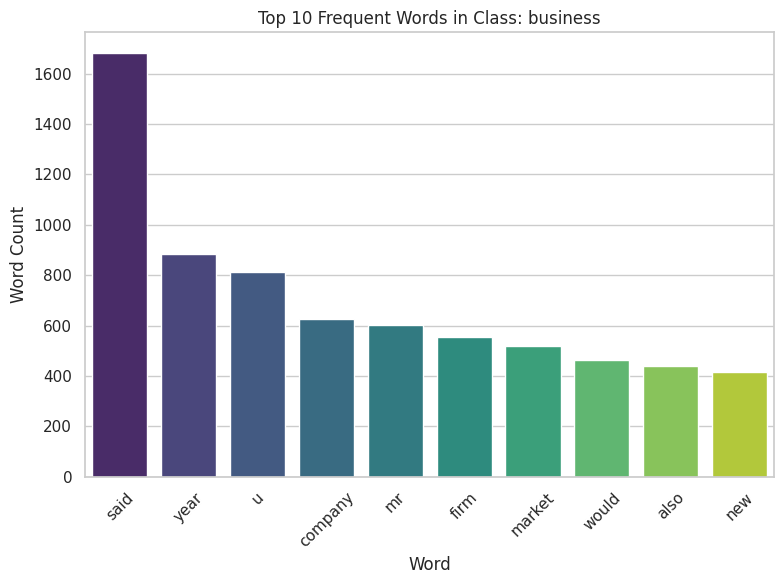

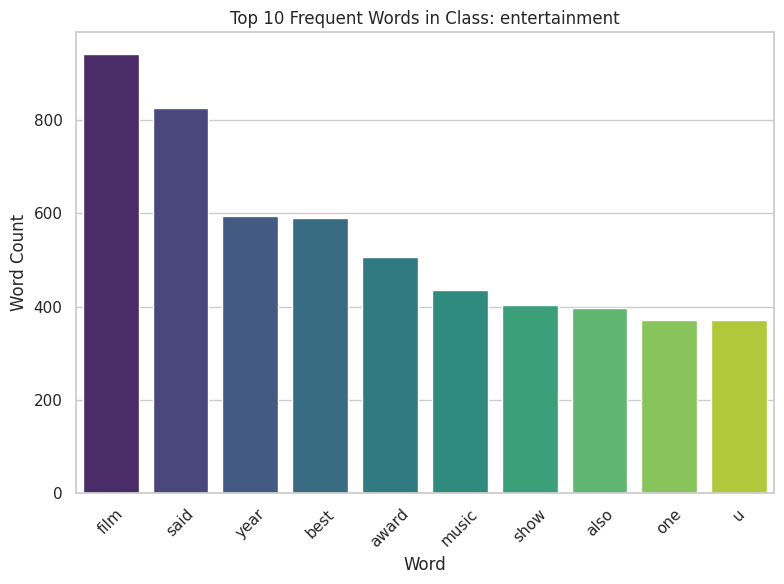

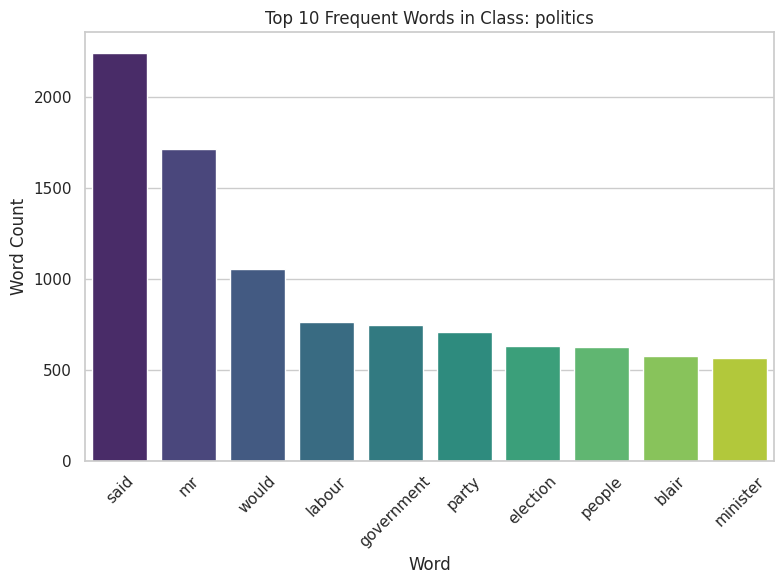

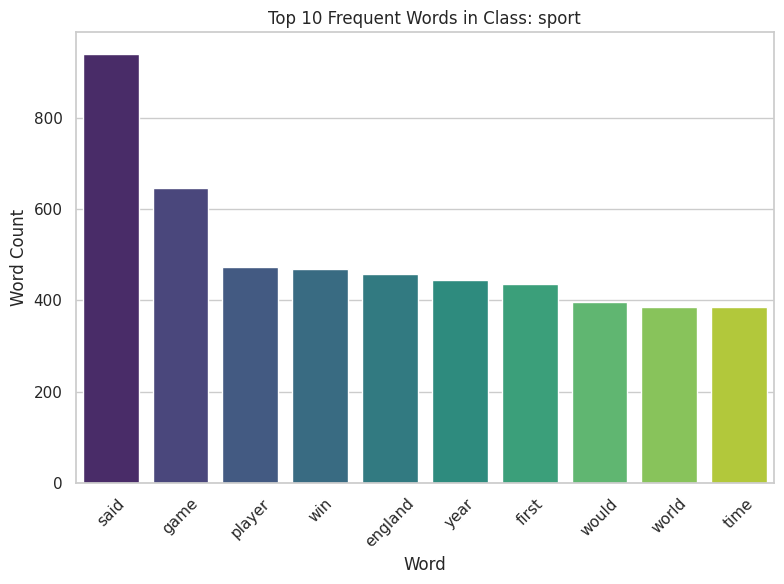

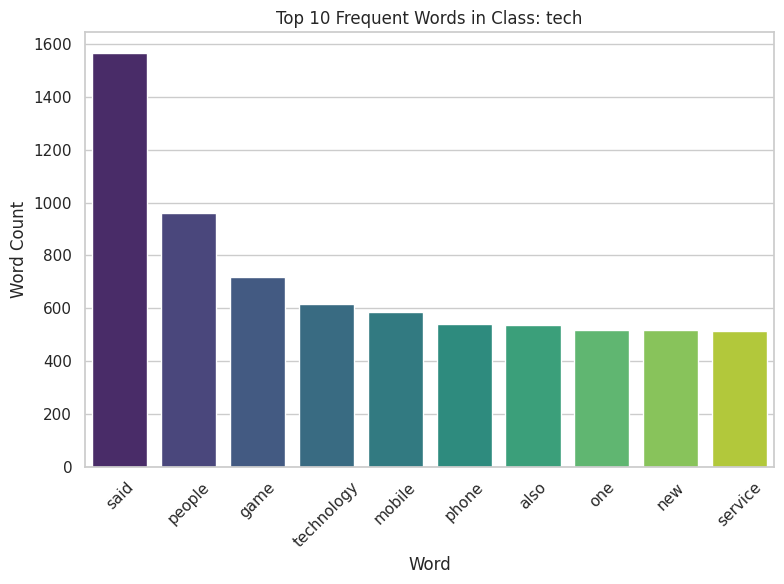

In [10]:
get_top_words_by_class(df,'text_processed')

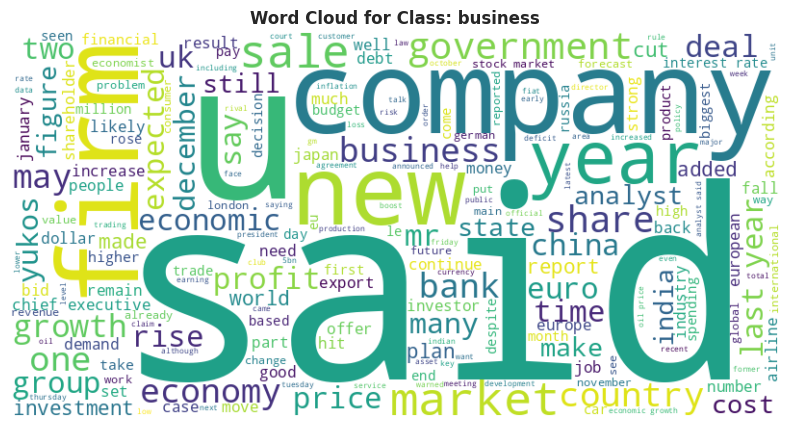

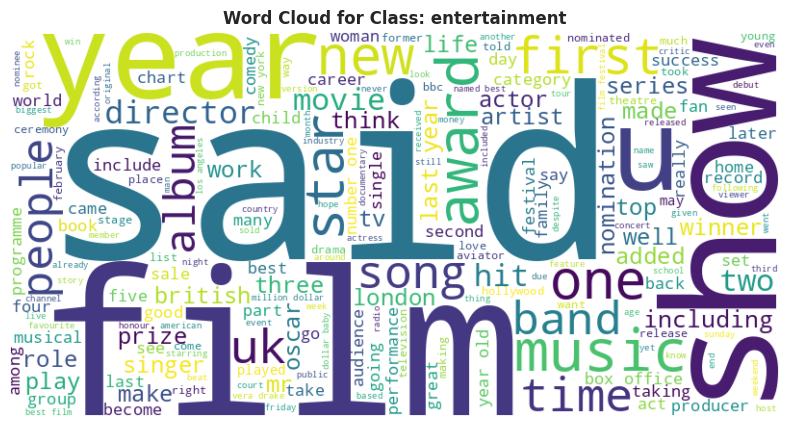

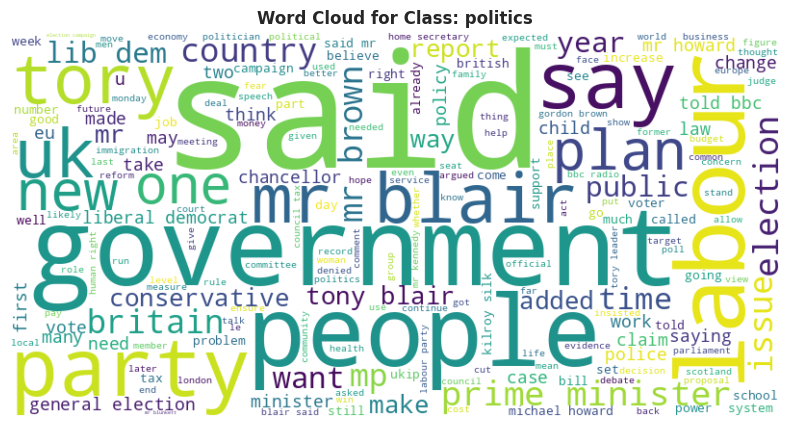

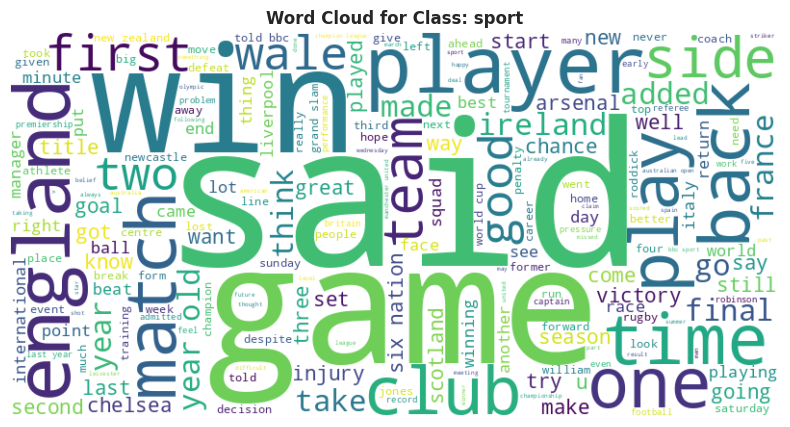

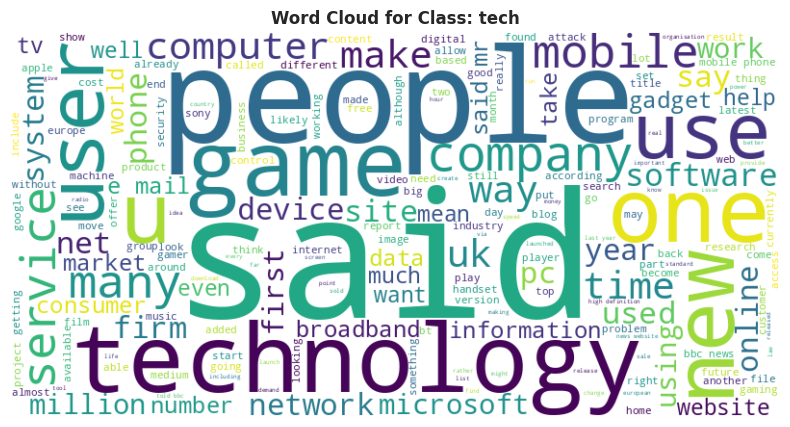

In [11]:
from wordcloud import WordCloud

# Create a word cloud for each class
def create_word_clouds(df, text_column_name):
    # Group the DataFrame by 'category' column
    grouped = df.groupby('category')

    # Iterate through each group (class)
    for category, group_df in grouped:
        # Concatenate all text within the class
        text = ' '.join(group_df[text_column_name])

        # Generate a word cloud for the class
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud for the class
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Class: {category}', fontweight='bold')
        plt.axis('off')  # Turn off axis labels
        plt.show()
create_word_clouds(df, 'text_processed')

**Label Encoding**

In [12]:
df

,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell 0....
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...
2223,politics,how political squabbles snowball it s become c...,political squabble snowball become commonplace...


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
class_names = label_encoder.classes_
X = df['text_processed']
y = df['category']
y

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Name: category, Length: 2225, dtype: int64

**Text Vectorization with TF-IDF**

Explanation: TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert text data into numerical features. It evaluates the importance of each word in a document relative to a collection of documents (corpus). TF-IDF assigns higher weights to words that are frequent in a specific document but rare in other documents, allowing us to represent text data in a way that highlights important terms while reducing the impact of common words.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

**Data Splitting: Creating Training and Testing Sets**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

**Model Evaluation**

In [17]:
# Importing necessary metrics from scikit-learn
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
)


# Defining a function to evaluate the model and display metrics
def evaluate(model, conf_matrix=True, return_=False):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Displaying the Confusion Matrix if specified
    if conf_matrix:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_names,
            yticklabels=class_names,
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        # Displaying the Classification Report
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Calculating and displaying additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')



    # Displaying the summary metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")


    # Extracting the model name for display
    model_name = str(type(model).__name__)
    # Returning metrics as a dictionary if specified
    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 2),
            "precision": round(precision, 2),
            "recall": round(recall, 2),
            "f1": round(f1, 2),

        }
        return metrics_dict

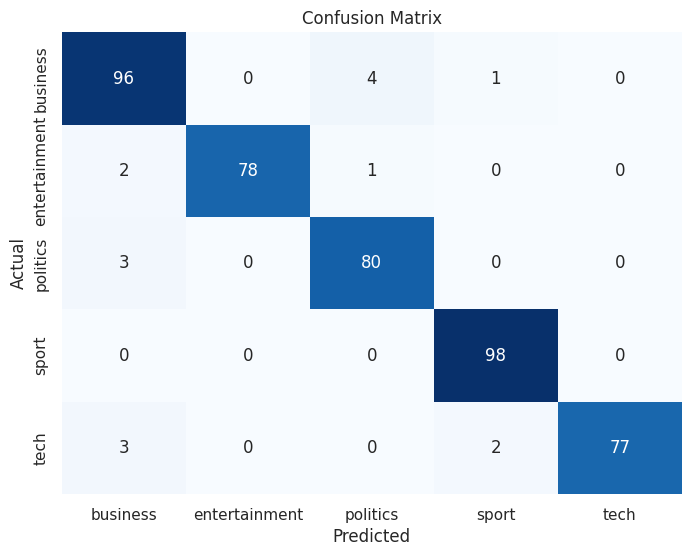

               precision    recall  f1-score   support

     business       0.92      0.95      0.94       101
entertainment       1.00      0.96      0.98        81
     politics       0.94      0.96      0.95        83
        sport       0.97      1.00      0.98        98
         tech       1.00      0.94      0.97        82

     accuracy                           0.96       445
    macro avg       0.97      0.96      0.96       445
 weighted avg       0.97      0.96      0.96       445

Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96


In [18]:
# Importing LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating an instance of LogisticRegression
Logistic_Regression = LogisticRegression(random_state=42)

# Fitting the model to the training data
Logistic_Regression.fit(X_train, y_train)

# Evaluating and displaying the performance of the Logistic Regression model
evaluate(Logistic_Regression)

**Support Vector Machine (SVM) Model**

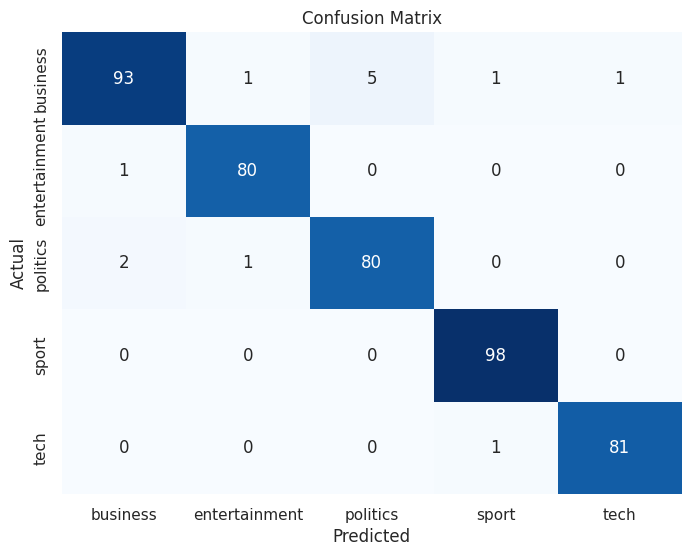

               precision    recall  f1-score   support

     business       0.97      0.92      0.94       101
entertainment       0.98      0.99      0.98        81
     politics       0.94      0.96      0.95        83
        sport       0.98      1.00      0.99        98
         tech       0.99      0.99      0.99        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97


In [22]:
# Importing Support Vector Classification (SVC) from scikit-learn
from sklearn.svm import SVC

# Creating an instance of SVC with a linear kernel
svc = SVC(kernel="linear", random_state=42, probability=True, C=3)

# Training the SVC model on the training data
svc.fit(X_train, y_train)

# Evaluating and displaying the performance of the SVC model
evaluate(svc)